<a href="https://www.kaggle.com/code/mikhail1681/mcdonald-s-market-capitalization-analysis?scriptVersionId=165685457" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mcdonalds-financial-statements-2002-2022/McDonalds_financial_statements.csv


The goal of the project is to analyze data on companies' market capitalization and their financial performance using a linear regression model in order to:

1. Understanding the relationship between companies' financial performance and their market capitalization.

2. Building a model that can predict the market capitalization of a company based on its financial indicators.

3. Providing a tool for investors, analysts and business executives to help them make informed investment decisions, assess the financial health of companies and formulate business strategies.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data preparation and research.

In [3]:
df = pd.read_csv('/kaggle/input/mcdonalds-financial-statements-2002-2022/McDonalds_financial_statements.csv')

In [4]:
df.head()

,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),Cash on Hand ($B),Dividend Yield (%),Dividend (stock split adjusted) ($),Net assets ($B),Total assets ($B),Total debt ($B),Total liabilities ($B)
0,2022,193.01,23.18,7.82,31.3,8.33,-32.2,33.76,8.42,0.73,2.58,2.15,5.66,-6.01,50.43,48.03,56.43
1,2021,200.31,23.22,9.12,26.5,8.63,-43.5,39.31,10.11,0.74,4.70,1.96,5.25,-4.61,53.60,48.64,58.20
2,2020,159.88,19.20,6.14,33.8,8.32,-20.4,31.97,6.35,0.74,3.44,2.35,5.04,-7.83,52.62,48.51,60.45
3,2019,147.47,21.28,8.01,24.8,6.93,-18.0,38.04,7.98,0.74,0.89,2.39,4.73,-8.22,47.51,46.87,55.72
4,2018,136.21,21.02,7.81,23.2,6.48,-21.8,37.17,7.65,0.76,0.86,2.36,4.19,-6.26,32.81,31.07,39.06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 21 non-null     int64  
 1   Market cap ($B)                      21 non-null     float64
 2   Revenue ($B)                         21 non-null     float64
 3   Earnings ($B)                        21 non-null     float64
 4   P/E ratio                            21 non-null     float64
 5   P/S ratio                            21 non-null     float64
 6   P/B ratio                            21 non-null     float64
 7   Operating Margin (%)                 21 non-null     float64
 8   EPS ($)                              21 non-null     float64
 9   Shares Outstanding ($B)              21 non-null     float64
 10  Cash on Hand ($B)                    21 non-null     float64
 11  Dividend Yield (%)                

In [6]:
df.describe()

,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),Cash on Hand ($B),Dividend Yield (%),Dividend (stock split adjusted) ($),Net assets ($B),Total assets ($B),Total debt ($B),Total liabilities ($B)
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2012.000000,96.824286,22.706190,6.214762,21.661905,4.234762,-7.100000,26.889048,4.852857,0.994762,2.387619,2.487143,2.754286,7.217143,35.016190,21.286190,27.793810
std,6.204837,50.396346,3.398316,2.226166,5.541974,2.266896,19.356029,8.355580,2.507501,0.200714,1.639948,0.575518,1.679874,9.489797,8.715523,14.922204,16.800857
min,2002.000000,20.390000,15.400000,1.660000,15.000000,1.320000,-45.900000,10.790000,0.700000,0.730000,0.330000,1.460000,0.240000,-8.220000,23.970000,8.430000,13.540000
25%,2007.000000,67.220000,20.810000,3.880000,16.500000,2.950000,-20.400000,19.300000,2.880000,0.790000,1.370000,2.150000,1.500000,-3.270000,29.390000,10.140000,14.840000
50%,2012.000000,90.220000,22.820000,6.860000,21.400000,3.360000,2.870000,28.520000,4.880000,1.000000,2.130000,2.390000,2.870000,12.850000,32.810000,13.630000,20.090000
75%,2017.000000,136.210000,24.620000,8.010000,24.800000,6.010000,5.530000,31.970000,6.350000,1.180000,2.580000,2.940000,3.830000,14.630000,36.620000,29.530000,37.070000
max,2022.000000,200.310000,28.100000,9.120000,33.800000,8.630000,15.100000,39.310000,10.110000,1.270000,7.680000,3.500000,5.660000,16.000000,53.600000,48.640000,60.450000


In [7]:
df.isna().sum()

Year                                   0
Market cap ($B)                        0
Revenue ($B)                           0
Earnings ($B)                          0
P/E ratio                              0
P/S ratio                              0
P/B ratio                              0
Operating Margin (%)                   0
EPS ($)                                0
Shares Outstanding ($B)                0
Cash on Hand ($B)                      0
Dividend Yield (%)                     0
Dividend (stock split adjusted) ($)    0
Net assets ($B)                        0
Total assets ($B)                      0
Total debt ($B)                        0
Total liabilities ($B)                 0
dtype: int64

In [8]:
indicators = ['Revenue ($B)', 'Earnings ($B)', 'P/E ratio',
       'P/S ratio', 'P/B ratio', 'Operating Margin (%)', 'EPS ($)',  
              'Total debt ($B)', 'Total liabilities ($B)']

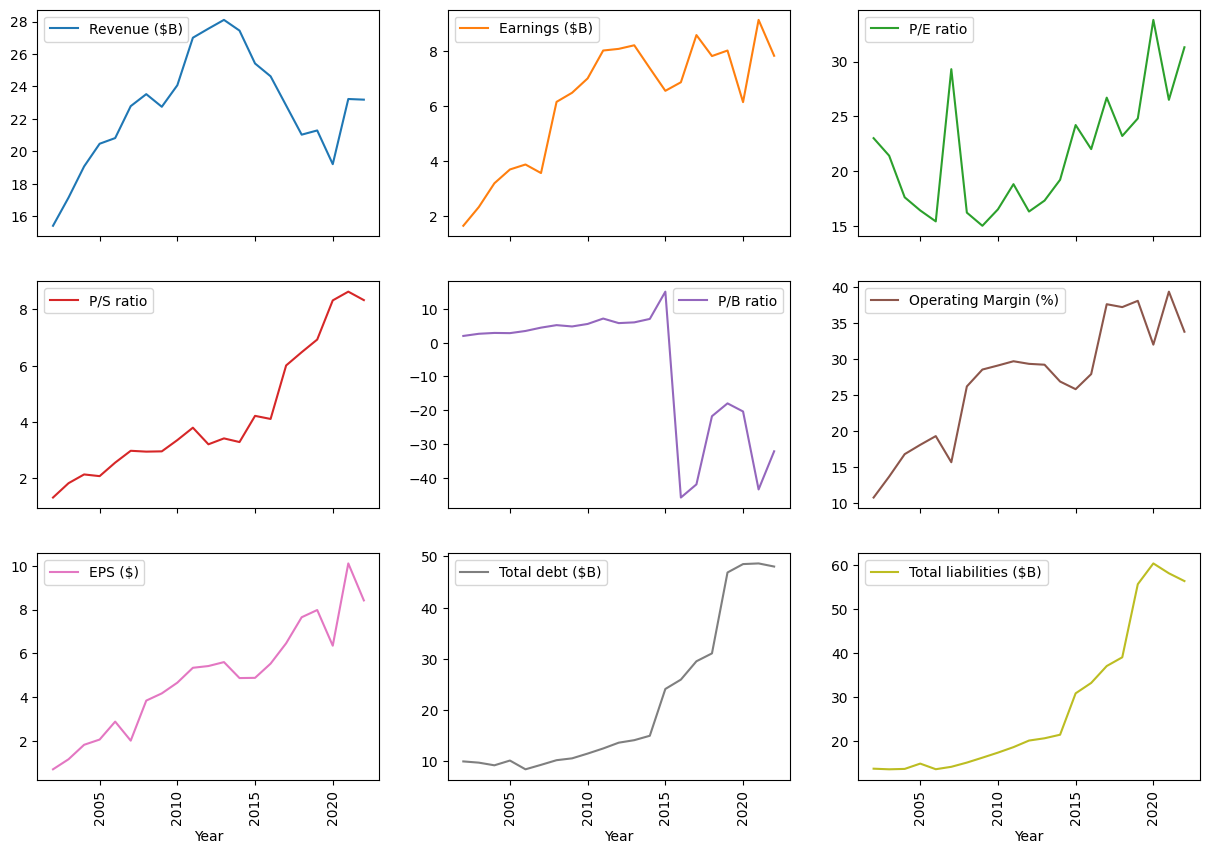

In [9]:
df.plot(x='Year', y=indicators, subplots=True, layout=(3, 3), figsize=(15, 10), sharex=True, rot=90);

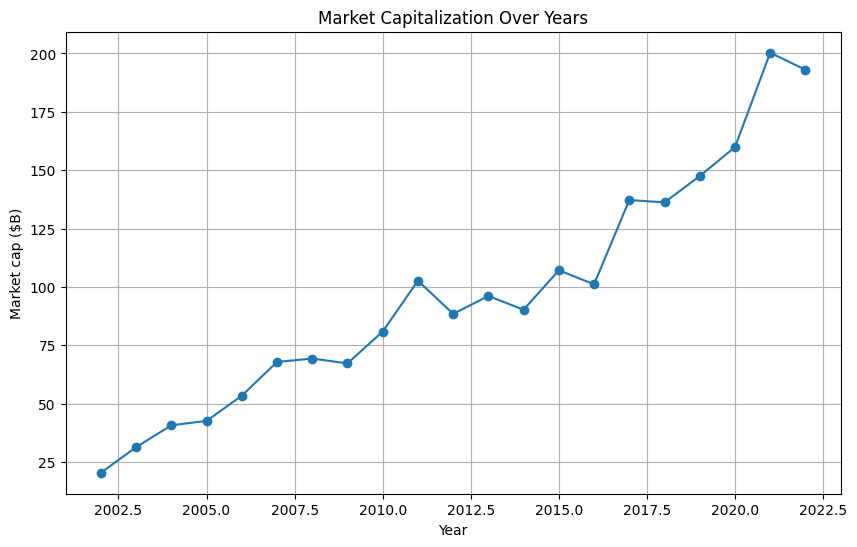

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Market cap ($B)'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Market cap ($B)')
plt.title('Market Capitalization Over Years')
plt.grid(True)

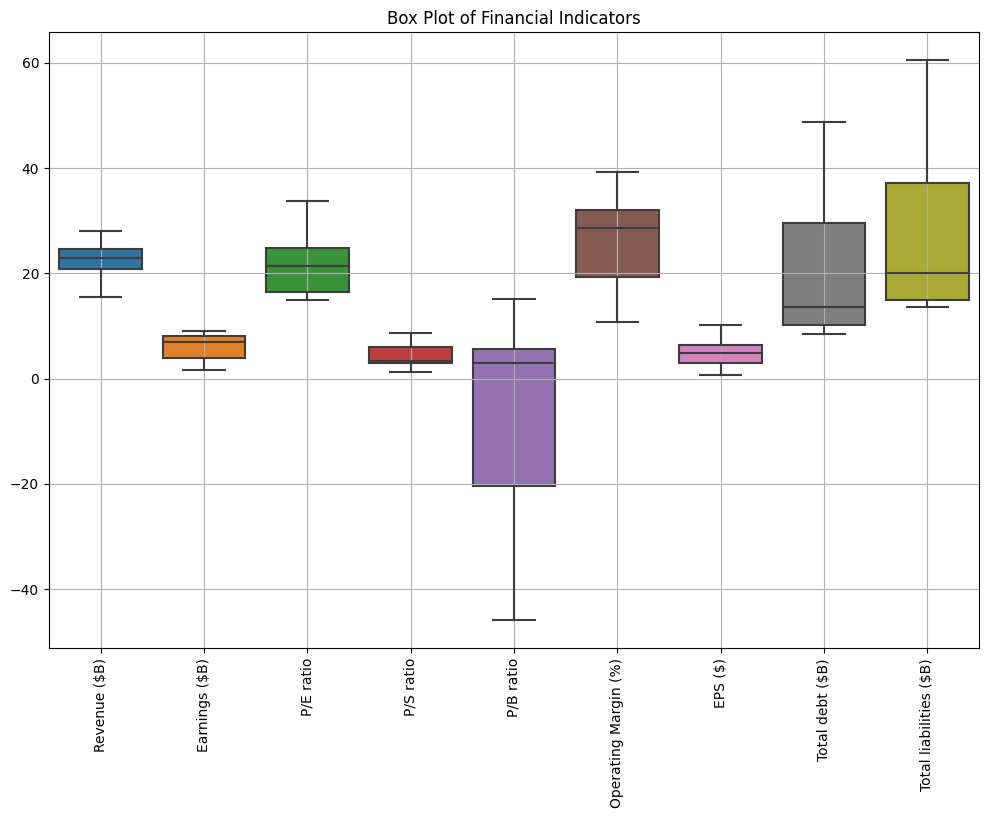

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[indicators])
plt.title('Box Plot of Financial Indicators')
plt.xticks(rotation=90)
plt.grid(True);

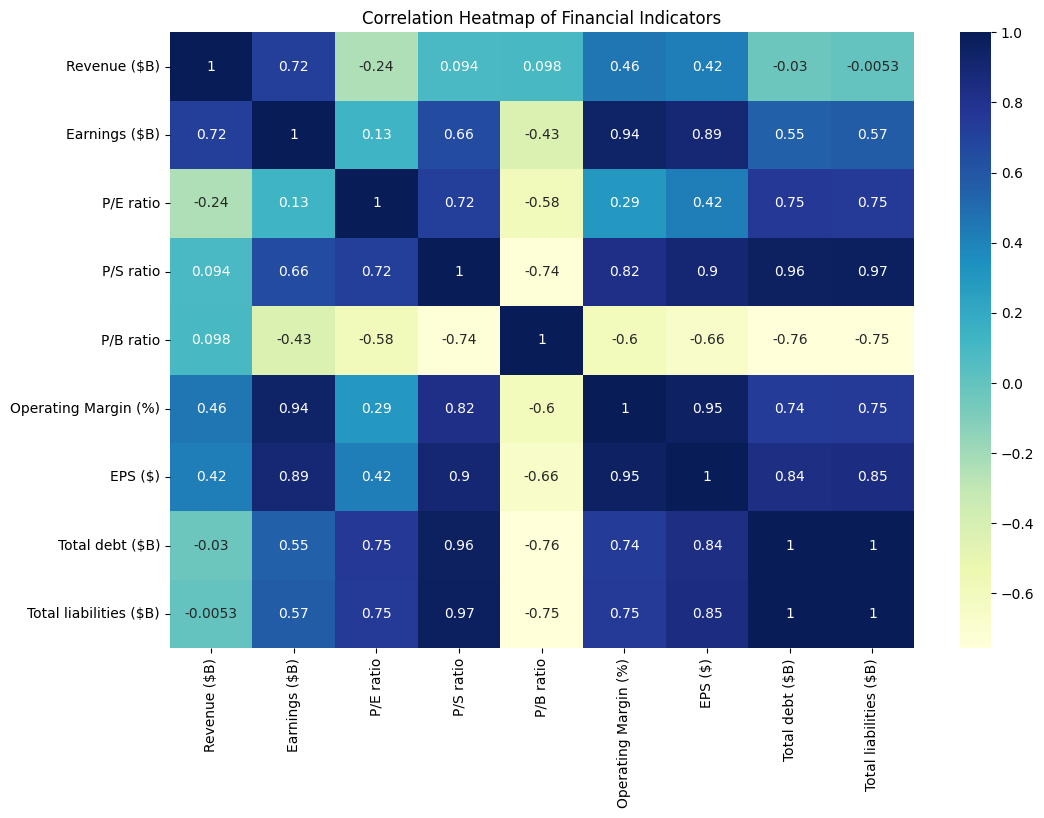

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[indicators].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap of Financial Indicators');

'Total debt' and 'Total liabilities' are financial measures that can be related because they both reflect a company's financial liabilities. If the correlation between the two is 1, it may indicate that the company's total liabilities, expressed in terms of Total Debt and Total Liabilities, are identical or nearly identical. Therefore, to avoid multicollinearity, we will remove one of these features.

In [13]:
new_indicators = ['Revenue ($B)', 'Earnings ($B)', 'P/E ratio',
       'P/S ratio', 'P/B ratio', 'Operating Margin (%)', 'EPS ($)', 'Total liabilities ($B)']

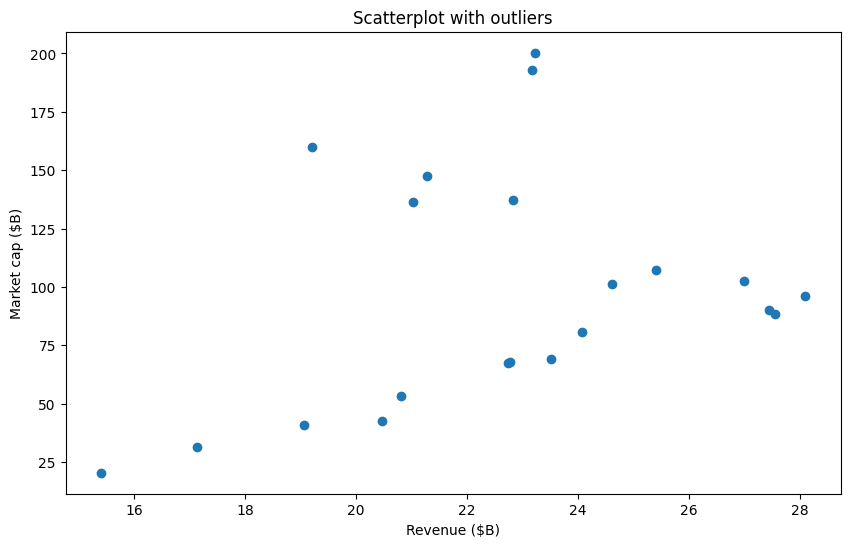

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Revenue ($B)'], df['Market cap ($B)'])
plt.xlabel('Revenue ($B)')
plt.ylabel('Market cap ($B)')
plt.title('Scatterplot with outliers');

# 2. Let's split the data into training and test sets to train the model and evaluate its quality.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df[['Revenue ($B)', 'Earnings ($B)', 'P/E ratio',
       'P/S ratio', 'P/B ratio', 'Operating Margin (%)', 
        'EPS ($)', 'Total liabilities ($B)']]

In [17]:
y = df['Market cap ($B)']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# 3. Let's scale the features

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train_scaled = scaler.fit_transform(X_train)

In [22]:
X_test_scaled = scaler.transform(X_test)

# 4. Training a linear regression model on a training data set.Training a linear regression model on a training data set.

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

# 5. Model evaluation.

In [26]:
model.score(X_test, y_test)

0.9797233195873954

In [27]:
from sklearn.metrics import mean_absolute_error

In [28]:
y_pred = model.predict(X_test)

In [29]:
mean_absolute_error(y_test, y_pred)

5.27462408803977

# 6. Additional analysis

In [30]:
model.coef_

array([-0.20867481, 15.77236841, -0.50337572, 27.10342896, -0.08704249,
       -3.79400818, -2.54259995, -0.10538923])

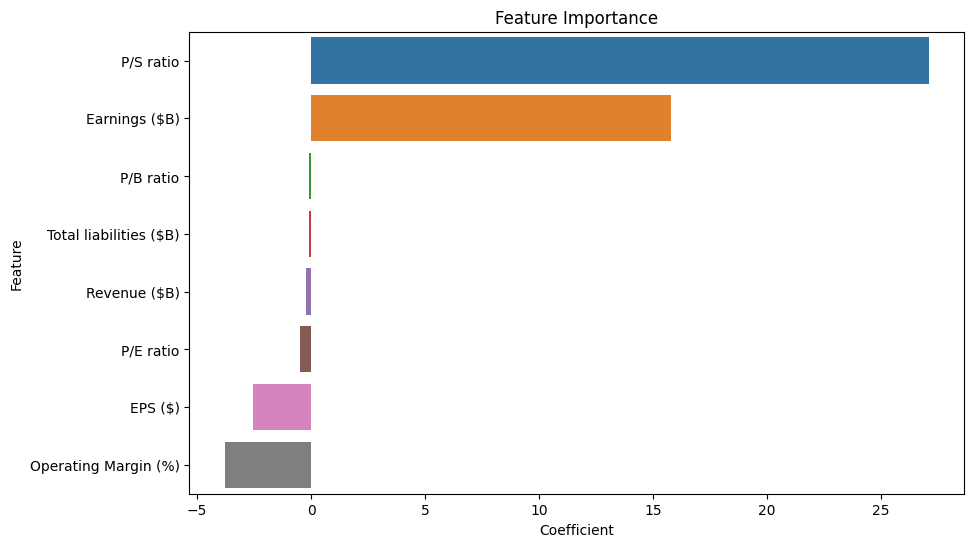

In [31]:
feature_importance = pd.Series(model.coef_, index=new_indicators).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.xlabel('Coefficient')
plt.ylabel('Feature');

Large positive values of the coefficients in the 'Feature Importance' plot indicate that the corresponding features have a positive effect on the model's predictions, while large negative values indicate the opposite.

**So, the assessment of the model looks very encouraging:**
1. The coefficient of determination of the model is approximately 0.980, which means that approximately 98% of the variance in the dependent variable (market capitalization) is explained by the independent variables (financial indicators).
2. The average absolute error (MAE) is approximately $5.27 billion, which means the model is on average off by this amount when predicting the market capitalization of companies.